In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x,y=mnist['data'].to_numpy(),mnist['t'].to_numpy()


In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

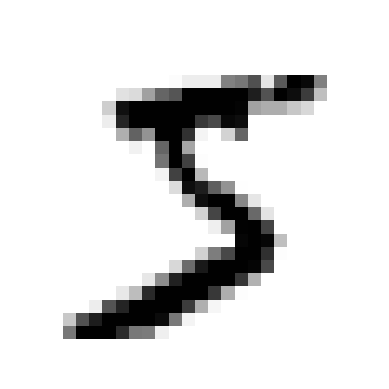

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Make sure x is a NumPy array
x = mnist["data"].to_numpy()  # Add this if you haven't already

some_digit = x[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()


In [22]:
# spilting data into different form
y[0]
import numpy as np

y=y.astype(np.uint8)
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [23]:
# TRAIning binary classifier
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [24]:
# loading RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [34]:
forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(x_train,y_train_5)

RandomForestClassifier(random_state=42)

In [36]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")

In [37]:
y_scores_forest=y_probas_forest[:,1]

In [38]:
from sklearn.metrics import roc_curve
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

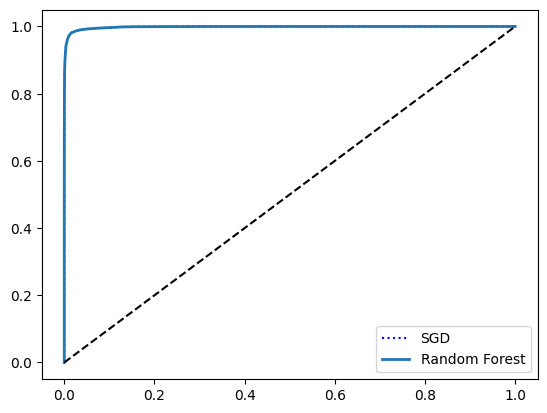

In [41]:
plt.plot(fpr_forest, tpr_forest, "b:", label="SGD")
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 [...] # Add axis labels and grid
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145